#data  https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data


link descarga 


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from google.colab import drive
drive.mount('/content/drive/')

!pwd 



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive
/content


In [22]:
!unzip '/content/drive/MyDrive/ColabNotebooks/Matematicas y algorimos/db/GlobalLandTemperaturesByCity.csv.zip'

Archive:  /content/drive/MyDrive/ColabNotebooks/Matematicas y algorimos/db/GlobalLandTemperaturesByCity.csv.zip
  inflating: GlobalLandTemperaturesByCity.csv  


In [56]:
!ls
dir='/content/GlobalLandTemperaturesByCity.csv'

df=pd.read_csv(dir)

df


drive  GlobalLandTemperaturesByCity.csv  sample_data


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [53]:
#Change dt in time variable
df['year']=pd.to_datetime(df['dt'])

#aplicando filtro
idx = df['year'] > pd.to_datetime('1970-01-01')
df=df[idx]




In [54]:

#vamos a agrupar con groupvy pais year temperatura
df_g =df.groupby(['Country',
            pd.Grouper(key='year',freq='1Y')
            ]).agg({'AverageTemperature':[np.mean,np.median]})
df_g

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          15.857136  17.2060
            1971-12-31          14.643854  15.3170
            1972-12-31          12.701448  14.0935
            1973-12-31          14.021750  14.7010
            1974-12-31          13.314448  14.2390
...                                   ...      ...
Zimbabwe    2009-12-31          20.106405  21.0780
            2010-12-31          20.741714  21.9430
            2011-12-31          20.366060  21.5110
            2012-12-31          20.218274  21.4885
            2013-12-31          19.404661  19.2320

[6996 rows x 2 columns]

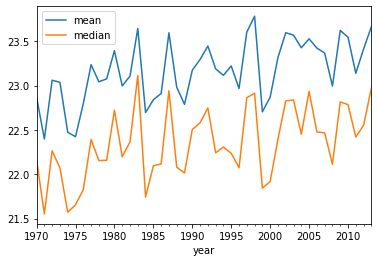

In [55]:


df_g.xs('Colombia')['AverageTemperature']
df_g.xs('Colombia')['AverageTemperature'].plot()


In [61]:
list(df)

['dt',
 'AverageTemperature',
 'AverageTemperatureUncertainty',
 'City',
 'Country',
 'Latitude',
 'Longitude']

In [34]:
df['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'